# Introduction to Data Analasys
## HW 2
##### Presenters:
Roi Maskalik, 212234637 <br>
Dvir Twito, 324270883

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hw_df = pd.read_csv("HW2-Data.csv")

### Question 1
There are 2 courses listed in the dataset: Math and Portuguese

In [145]:
df_gb_class = hw_df.groupby('class')
courses = df_gb_class.groups.keys()
print(f"There are {len(courses)} courses listed in the dataset.")
courses


There are 2 courses listed in the dataset.


dict_keys(['Math', 'Portuguese'])

### Question 2
There are 1044 students listed in the dataset.

In [147]:
print(f"There are {hw_df.shape[0]} students listed in the dataset")

There are 1044 students listed in the dataset


### Question 3
There are 395 students in Math course, and 649 students in Portuguese course.

In [348]:
df_gb_class['class'].value_counts()

class       class     
Math        Math          395
Portuguese  Portuguese    649
Name: class, dtype: int64

### Question 4
It seems that there is a correlation between having a romantic relationship and academic success:<br>
Students that have a romantic relationship have a lower final score on average and higher absece rate (higher absece median), thus they are achieving less academic success than the students that don't have a romantic relationhsip.

In [148]:
# The final score mean of students that have a romantic relationship
final_score_mean_romantic = hw_df[hw_df['romantic'] == 'yes']['G3'].mean()

# The final score mean of students that don't have a romantic relationship
final_score_mean_not_romantic = hw_df[hw_df['romantic'] == 'no']['G3'].mean()

# The absences median of students that have a romantic relationship
absences_median_romantic = hw_df[hw_df['romantic'] == 'yes']['absences'].median()

# The absences median of students that don't have a romantic relationship
absences_median_not_romantic = hw_df[hw_df['romantic'] == 'no']['absences'].median()

# Print the results
print('Final score mean:',
     '\nStudents that have a romantic relationship:', final_score_mean_romantic,
     "\nStudents that don't have a romantic relationship:", final_score_mean_not_romantic,
     '\n\nAbsences median:',
     '\nStudents that have a romantic relationship:', absences_median_romantic,
     "\nStudents that don't have a romantic relationship:", absences_median_not_romantic)

Final score mean: 
Students that have a romantic relationship: 10.830188679245284 
Students that don't have a romantic relationship: 11.62407132243685 

Absences median: 
Students that have a romantic relationship: 3.0 
Students that don't have a romantic relationship: 2.0


### Question 5
The histogram of the students’ ages presented below.<br>
We crated it by using the countplot function.

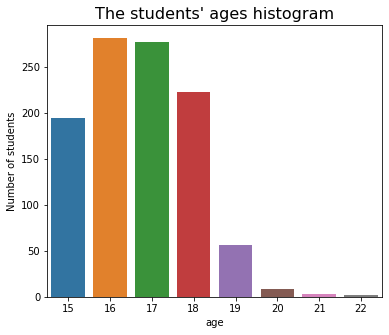

In [151]:
# Set the size of the histogram
plt.figure(figsize=(6, 5))

# Create the histogram
ages_hist = sns.countplot(data=hw_df, x='age')

# Set the label of the Y axis
ages_hist.set(ylabel='Number of students')

# Set the title
ages_hist.set_title("The students' ages histogram", fontsize=16)

# Show the histogram
plt.show()

### Question 6
The plot of the students’ mean grade in each class presented below.

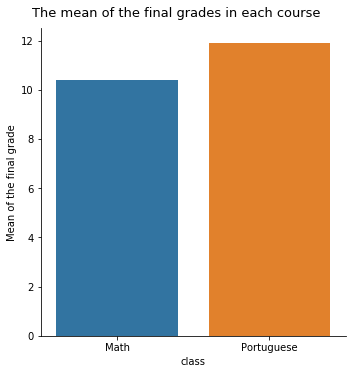

In [149]:
# Get the mean grade of each class
group_by_courses_mean_df = hw_df.groupby('class', as_index = False)['G3'].mean()

# Create the plot
median_by_courses_graph = sns.catplot(kind = 'bar', data = group_by_courses_mean_df, x = 'class', y ='G3')

# Set the the labels of the Y axis
median_by_courses_graph.set(ylabel= 'Mean of the final grade')

# Add a title
median_by_courses_graph.fig.suptitle('The mean of the final grades in each course', fontsize=13, y=1.03)

# Show plot and clean output
plt.show()

### Question 7

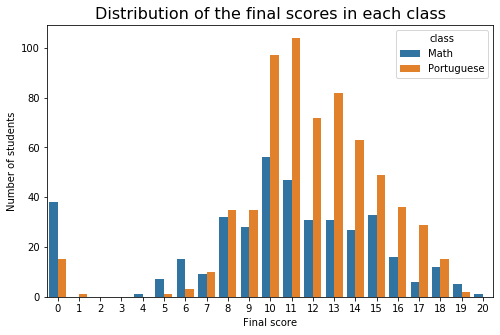

In [341]:
# Set the minimum and maximum grades
min_grade = 0
max_grade = 20

# Create array of all possible scores
optional_grades = np.arange(min_grade, max_grade + 1)

# Set the size of the plot
plt.figure(figsize=(8, 5))

# Plot the scores distribution
grades_count_plot = sns.countplot(data=hw_df, x='G3', hue='class', order=optional_grades)

# Set the the labels of the axes
grades_count_plot.set(xlabel="Final score", ylabel='Number of students')

# Set the title
grades_count_plot.set_title("Distribution of the final scores in each class", fontsize=16)

# Show plot and clean output
plt.show()

### Question 8
We can see from the graph that the Math course is almost balanced gender-wised, but the Portuguese course has significantly more females than males.

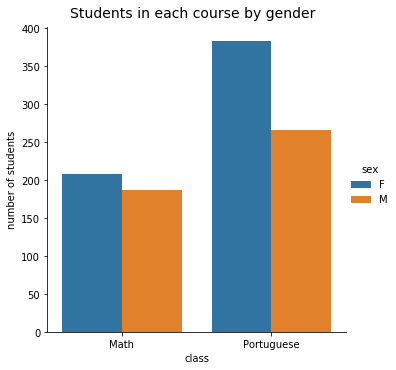

In [155]:
# Get the number of males and females in each course
group_by_courses_gender_df = hw_df.groupby(['class', 'sex']).size().reset_index(name='count')

# Create the plot
gender_by_courses_plot = sns.catplot(kind = 'bar', data = group_by_courses_gender_df, x='class', y='count', hue='sex')

# Set the the labels of the Y axis
gender_by_courses_plot.set(ylabel= 'number of students')

# Set the title
gender_by_courses_plot.fig.suptitle('Students in each course by gender', fontsize=14, y=1.02)

# Show plot and clean output
plt.show()

### Question 9
We created two side by side box plots which represent the final scores in the extra paid classes and the non extra paid clsses.

In the plots we can see that the scores in the non extra paid classes are a little bit higher. For example, the mean, the median, the minimum score and the maximum score are higher in the non extra paid classes.<br>
However, those differences are very minor, so we think that there is no association between those two things.

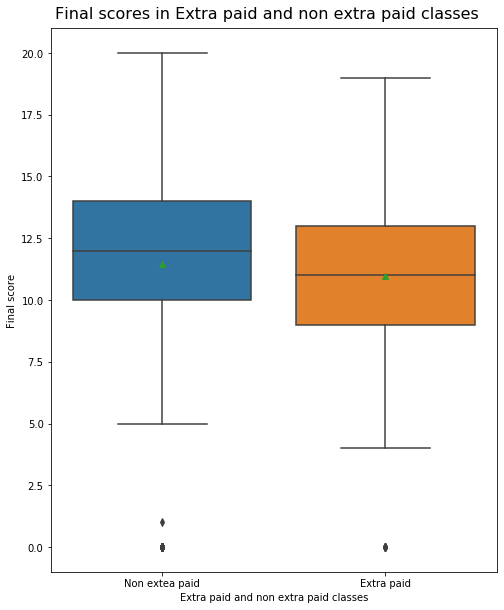

In [187]:
# # Get the series of final scores
# paid_class_grades = hw_df[hw_df['paid'] == 'yes']['G3']
# non_paid_class_grades = hw_df[hw_df['paid'] == 'no']['G3']

# Create the box plots
box_plot = sns.boxplot(data=hw_df, x='paid', y='G3', showmeans=True)

# Set the lables of the axes
box_plot.set(xlabel='Extra paid and non extra paid classes', ylabel='Final score')

# Set the ticks of the x axis
box_plot.set_xticklabels(['Non extea paid','Extra paid'])

# Add a title
box_plot.figure.suptitle("Final scores in Extra paid and non extra paid classes", fontsize=16, y=0.91)

# Enlarge the size of the plot, so the differences can be easier spotted
box_plot.figure.set_size_inches(8,10)

# Show plot and clean output
plt.show()

### Question 10

### Question 11
We created a bar plot which presents the number of students drinking during the weekdays and the weekends, for each level of alcohol consumption.
We can learn from the plot that most of the students who drink more than a little bit, do it during the weekends. Thus, we can conclude that it is more plausible that students will drink during the weekends rather than during the weekdays.

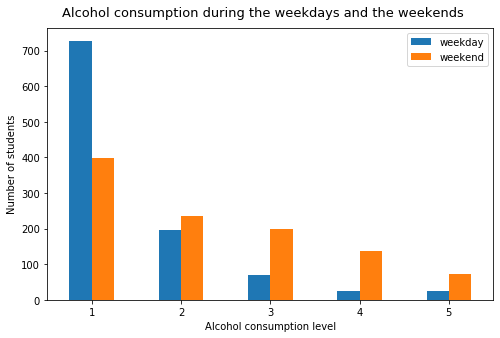

In [325]:
# Create dataframe for the weekdays
weekday_alcohol = hw_df['Dalc']
weekday_alcohol_count = weekday_alcohol.value_counts()

# Create dataframe for the weekendss
weekend_alcohol = hw_df['Walc']
weekend_alcohol_count = weekend_alcohol.value_counts()

# Create array of the alcohol consumption levels
alcohol_consumption_levels = np.arange(1, 6)

# Create dataframe for the alcohol consumption levels count
alcohol_df = pd.DataFrame({'alcohol': alcohol_consumption_levels, 'weekday': weekday_alcohol_count,
                           'weekend':weekend_alcohol_count})

# Create the plot
fig, axs = plt.subplots()
alcohol_df.plot(kind='bar', x='alcohol', y=['weekday', 'weekend'], ax = axs)

# Rotate the tick marks in the x axis
axs.tick_params('x',labelrotation=0)

# Set the lables of the axes
plt.xlabel('Alcohol consumption level')
plt.ylabel('Number of students')

# Add a title
fig.suptitle("Alcohol consumption during the weekdays and the weekends", fontsize=13, y=0.94)

# Set the size of the plot
fig.set_size_inches(8,5)

# Show plot and clean output
plt.show()

### Question 12

In [350]:
hw_df['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

### Question 13
In question number 10, we can see that there is a positive correlation between alcohol consumption among the students and their absences.<br>
Although there is some relationship between those two things (correlation), we can't infer from the data that this relationship is causal.<br>
We think that we were able to determine (at least more accurately) whether or not this relationship is causal if we were given more data. Right now, the relationship between those two thing can be causal, but there might a third thing that causes the two, or that the correlation is a coincidence.<br>
We think that we will be able to determine that if we will have information about why the students are absent, or why the students are drinkung alcohol.<bt>
For example, if someone will ask those students why they are absent and they will say that it's because that there is an online recording of the class so they watch it, or that there are many summaries of the material, we will know that probably the relationship is not causal.

### Question 14

### 1


In [108]:
def infected_count_from_single_patient(prob_infect, num_meet):
    ''' Calculates the number of infected from a single patient. '''
    people_status = ['Infected', 'Not infected']
    probabilities = [prob_infect, 1 - prob_infect]
    results =  np.random.choice(people_status, p=probabilities, size=num_meet)
    return np.count_nonzero(results == 'Infected')

def run_covid_simulation(num_initial, num_generations, prob_infect, num_meet):
    ''' Runs one simulation. '''
    total_infecteds = num_initial
    infecteds_last_generation = num_initial
    for generation in np.arange(1, num_generations):
        infecteds_current_generation = 0
        for infected in np.arange(infecteds_last_generation):
            infecteds_current_generation += infected_count_from_single_patient(prob_infect, num_meet)
        total_infecteds += infecteds_current_generation
        infecteds_last_generation = infecteds_current_generation
    
    return total_infecteds


###  Question 2

In [109]:
def run_covid_simulations(num_sim, num_initial, num_generations, prob_infect, num_meet):
    ''' Runs a given amoun of simulations. '''
    results = np.empty(num_sim, dtype=int)
    for simulation in np.arange(num_sim):
        results[simulation] = run_covid_simulation(num_initial, num_generations, prob_infect, num_meet)
    return results

### Question 3
We set the parameters of the simulations, and created a plot of the results using the funcrion from question number 2.

[Text(0.5, 1.0, 'Histogram of 1000 simulations containing 4 generations each')]

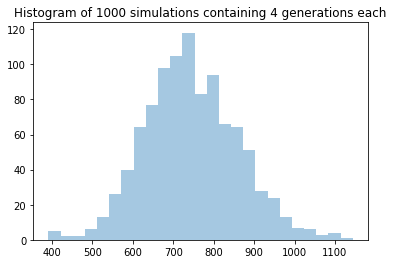

In [125]:
# Set the parameters of the simulations
num_sim = 1000
num_initial = 10
num_generations = 4
prob_infect = 0.2
num_meet = 19

# Run the simulation and create the plot of the results
simulations_results = run_covid_simulations(num_sim, num_initial, num_generations, prob_infect, num_meet)
simulations_plot = sns.distplot(simulations_results, kde=False)
simulations_plot.set(title=f"Histogram of {num_sim} simulations containing {num_generations} generations each")

# Show plot and clean output
plt.show()

### Question 4
We created a function that runs 10 sets of simulations, each one with number of generations running from 1 to 10, and returns the average number of infected people for each set of simulations.
Then, we used this function twice. The first time was with prob_infect = 0.05 and num_meet = 10, so R0 = 0.5, and the other with prob_infect = 0.15 and num_meet = 10, so R0 = 1.5.
Then, we created a data frame from the averages of each call, and plotted a line plot from the dataframe.

We understood the impotance of trying to get R0 less than 1: Since the number of infecteds grows exponentially, we need to try and get R0, which is the base of the power, less than 1, so the of the number of infecteds won't tend to infinity.<br>
We can see it in the plots: the line which corresponds to R0 = 0.5 is almost not changing, while the line corresponds to R0 = 1.5 grows rapidly.

In [87]:
def run_simulations_from_1_to_10(num_sim, num_initial, prob_infect, num_meet):
    ''' Runs 10 sets of simulations with num_generations ranging from 1 to 10,
        and returns an array contains the average of each infecteds. '''
    average_infecteds = np.empty(10)
    for num_generations in np.arange(1, 11):
        infecteds_count_array = run_covid_simulations(num_sim, num_initial, num_generations, prob_infect, num_meet)
        average_infecteds[num_generations - 1] = infecteds_count_array.mean()
    return average_infecteds

In [114]:
# Set parameters for R0 = 0.5
prob_infect_R0_smaller_than_1 = 0.05
num_meet_R0_smaller_than_1 = 10

# Get the average infecteds count corresponding to R0 = 0.5
average_infecteds_R0_smaller_than_1 = run_simulations_from_1_to_10(num_sim, num_initial,
                                                                   prob_infect_R0_smaller_than_1,
                                                                   num_meet_R0_smaller_than_1)

In [113]:
# Set parameters for R0 = 1.5
prob_infect_R0_bigger_than_1 = 0.15
num_meet_R0_bigger_than_1 = 10

# Get the average infecteds count corresponding to R0 = 1.5
average_infecteds_R0_bigger_than_1 = run_simulations_from_1_to_10(num_sim, num_initial,
                                                                     prob_infect_R0_bigger_than_1,
                                                                     num_meet_R0_bigger_than_1)

In [126]:
# Create the data frame
infecteds_average_df = pd.DataFrame({'generation':np.arange(1, 11),
                                     'small_R0':average_infecteds_R0_smaller_than_1,
                                     'big_R0':average_infecteds_R0_bigger_than_1})

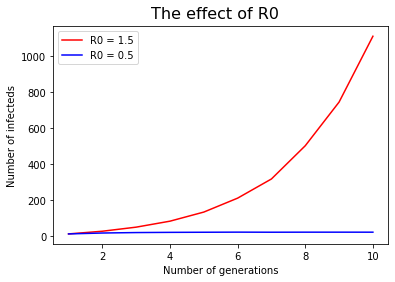

In [143]:
# Plot the results
infected_line_plot = sns.lineplot(data=infecteds_average_df, x='generation', y='big_R0', label='R0 = 1.5', color='red')
sns.lineplot(data=infecteds_average_df, x='generation', y='small_R0', label='R0 = 0.5', color='blue')
infected_line_plot.set(xlabel='Number of generations', ylabel='Number of infecteds')
infected_line_plot.figure.suptitle('The effect of R0', fontsize=16, y=0.95)

# Show plot and clean output
plt.show()